In [1]:
# Research Questions: Did the COVID-19 permanently affect the demand for small homes?

In [ ]:
### To explore the impact of COVID-19 on the demand for small homes

### 1. Hedonic Model
### 2. Panel Regression
### 3. Coefficient visualisation


In [32]:
import pandas as pd
import glob
import statsmodels.api as sm

In [33]:
## 1. Hedonic Model： price, numberrooms, tfarea ##

In [34]:
# Read in data
allhomes = pd.read_csv("./SH_2_combined_three periods_cleaned.csv")  # 01/01/2019 - 12/31/2022

In [35]:
# Data preprocessing
allhomes = allhomes[['price',  'numberrooms', 'tfarea']]  # Select relevant columns
allhomes = allhomes.dropna()  # Remove rows with missing values

# Define the model
X = allhomes[[ 'numberrooms', 'tfarea']]  # Select independent variable
X = sm.add_constant(X)  # Add constant term for intercept
y = allhomes['price']  # Dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                 3.392e+05
Date:                Sun, 13 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:53:55   Log-Likelihood:            -3.0406e+07
No. Observations:             2175798   AIC:                         6.081e+07
Df Residuals:                 2175795   BIC:                         6.081e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.024e+04    582.478    -69.089      

In [ ]:
###   2. Panel Model   ###

In [51]:
# Small Homes: Detached, Semi-Detached, Terraced, Flat or Maisonettes

# Read in data
smallhomeall = pd.read_csv("./SH_3_Small homes_all_housing type.csv")  # 01/01/2019 - 12/31/2022

# Create dummy variable for property type 'D'
smallhomeall['property_D'] = (smallhomeall['propertytype'] == 'D').astype(int)


# Specify time periods
periods = [
    ('2019-01-01', '2020-03-23'),
    ('2020-03-24', '2021-04-12'),
    ('2021-04-13', '2022-12-12')
]

# Loop through time periods and run fixed effects regression
for start_date, end_date in periods:
    subset = smallhomeall[(smallhomeall['dateoftransfer'] >= start_date) & (smallhomeall['dateoftransfer'] <= end_date)]
    y = subset['price']
    X = subset[['property_D']]  # Include other relevant control variables
    
    # Create panel data structure
    panel_data = pd.DataFrame({'y': y, 'property_D': X['property_D']})
    
    # Run fixed effects regression
    model = sm.OLS(panel_data['y'], sm.add_constant(panel_data['property_D'])).fit()
    
    # Print regression results
    print(f"Time Period: {start_date} to {end_date}")
    print(model.summary())
    print("=" * 50)


Time Period: 2019-01-01 to 2020-03-23
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     66.58
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           3.38e-16
Time:                        13:07:31   Log-Likelihood:            -2.8011e+06
No. Observations:              211296   AIC:                         5.602e+06
Df Residuals:                  211294   BIC:                         5.602e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2

In [46]:
# Comfortable Homes: Detached, Semi-Detached, Terraced, Flat or Maisonettes

# Read in data
comfortableall = pd.read_csv("./SH_4_Comfortable Homes_all_housing type.csv")  # 01/01/2019 - 12/31/2022

# Create dummy variable for property type 'D'
comfortableall['property_D'] = (comfortableall['propertytype'] == 'D').astype(int)


# Specify time periods
periods = [
    ('2019-01-01', '2020-03-23'),
    ('2020-03-24', '2021-04-12'),
    ('2021-04-13', '2022-12-12')
]

# Loop through time periods and run fixed effects regression
for start_date, end_date in periods:
    subset = comfortableall[(comfortableall['dateoftransfer'] >= start_date) & (comfortableall['dateoftransfer'] <= end_date)]
    y = subset['price']
    X = subset[['property_D']]  # Include other relevant control variables
    
    # Create panel data structure
    panel_data = pd.DataFrame({'y': y, 'property_D': X['property_D']})
    
    # Run fixed effects regression
    model = sm.OLS(panel_data['y'], sm.add_constant(panel_data['property_D'])).fit()
    
    # Print regression results
    print(f"Time Period: {start_date} to {end_date}")
    print(model.summary())
    print("=" * 50)


Time Period: 2019-01-01 to 2020-03-23
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                 2.290e+04
Date:                Sun, 13 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:00:39   Log-Likelihood:            -5.2078e+06
No. Observations:              363809   AIC:                         1.042e+07
Df Residuals:                  363807   BIC:                         1.042e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.

In [1]:
###  3. Coefficient visualisation   ###

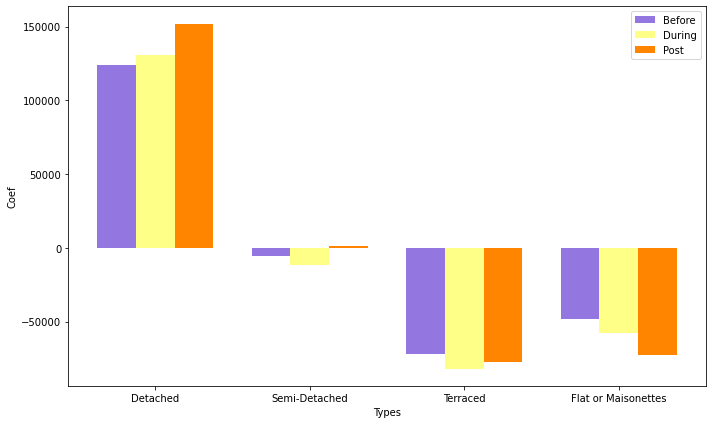

In [43]:
# Small Homes

import matplotlib.pyplot as plt

types = ['Detached', 'Semi-Detached', 'Terraced', 'Flat or Maisonettes']
before = [1.24E+05, -5199.0328, -7.19E+04, -4.83E+04]
during = [1.31E+05, -1.17E+04, -8.18E+04, -5.76E+04]
post = [1.52E+05, 1470.3194, -7.75E+04, -7.29E+04]

x = range(len(types))
bar_width = 0.25  # Adjust the bar width here

# Custom colors for each time period
color_before = '#9376E0'
color_during = '#FEFF86'
color_post = '#FF8400'

plt.figure(figsize=(10, 6))
plt.bar(x, before, width=bar_width, color=color_before, label='Before')
plt.bar([i + bar_width for i in x], during, width=bar_width, color=color_during, label='During')
plt.bar([i + 2 * bar_width for i in x], post, width=bar_width, color=color_post, label='Post')

plt.xlabel('Types')
plt.ylabel('Coef')
# plt.title('Population Changes for Different Home Types Before, During, and Post')
plt.xticks([i + bar_width for i in x], types)
plt.legend()
plt.tight_layout()

plt.show()


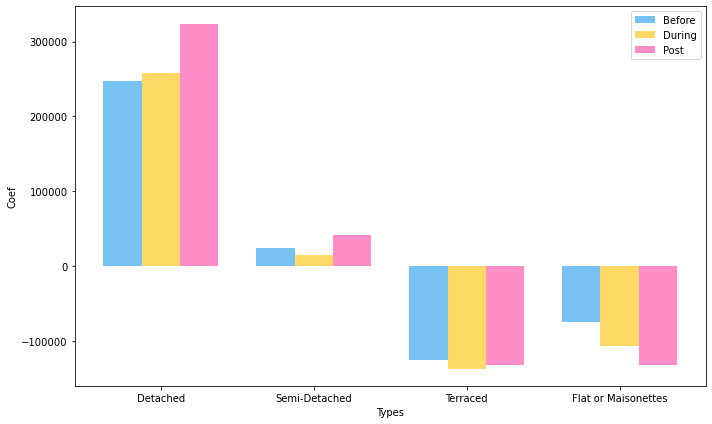

In [48]:
# Comfortable home

import matplotlib.pyplot as plt

types = ['Detached', 'Semi-Detached', 'Terraced', 'Flat or Maisonettes']
before = [2.48E+05, 2.47E+04, -1.25E+05, -7.52E+04]
during = [2.58E+05, 1.42E+04, -1.37E+05, -1.07E+05]
post = [3.24E+05, 4.14E+04, -1.32E+05, -1.32E+05]

x = range(len(types))
bar_width = 0.25  # Adjust the bar width here

# Custom colors for each time period
color_before = '#78C1F3'
color_during = '#FFD966'
color_post = '#FF8DC7'

plt.figure(figsize=(10, 6))
plt.bar(x, before, width=bar_width, color=color_before, label='Before')
plt.bar([i + bar_width for i in x], during, width=bar_width, color=color_during, label='During')
plt.bar([i + 2 * bar_width for i in x], post, width=bar_width, color=color_post, label='Post')

plt.xlabel('Types')
plt.ylabel('Coef')
# plt.title('Population Changes for Different Home Types Before, During, and Post')
plt.xticks([i + bar_width for i in x], types)
plt.legend()
plt.tight_layout()

plt.show()
